<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">MindAble</div>

# <b><span style='color:#4B4B4B'></span><span style='color:#016CC9'> Project Objectives </span></b>

Within the workplace, we would like to

- Analyse the differing attitudes towards mental health and frequency of mental health disorders.
- Insight in how each employee would like to work to optimise their productivity whilst ensuring a positive workplace. 
- Identify what factors need to be highlighted based on survey data and use data mining to create various proposals for implementing workplace improvements.

We face the difficulties of:
- How do we reduce the stigma surrounding mental health in the workplace?
- How do we identify what business can do to create a mentally resilient environment?
- Can we identify what factors play the biggest part in employee mental health?
- Can we create clear and concise action proposals based on data?

# <b><span style='color:#4B4B4B'></span><span style='color:#016CC9'> Introduction </span></b>

The promoted solution 'MindAble' is designed for Challenge 4 'Healthy Minds, Healthy Lives' of Project Hack 16 by Team WorkMind. MindAble is a cross-platform web application. It is able to collect anonymous survey data from employees and perform automatic data mining and visualization techniques that help HR and business owners to understand the survey data, make a data-driven decision and create a better mentally resilient and productive environment.

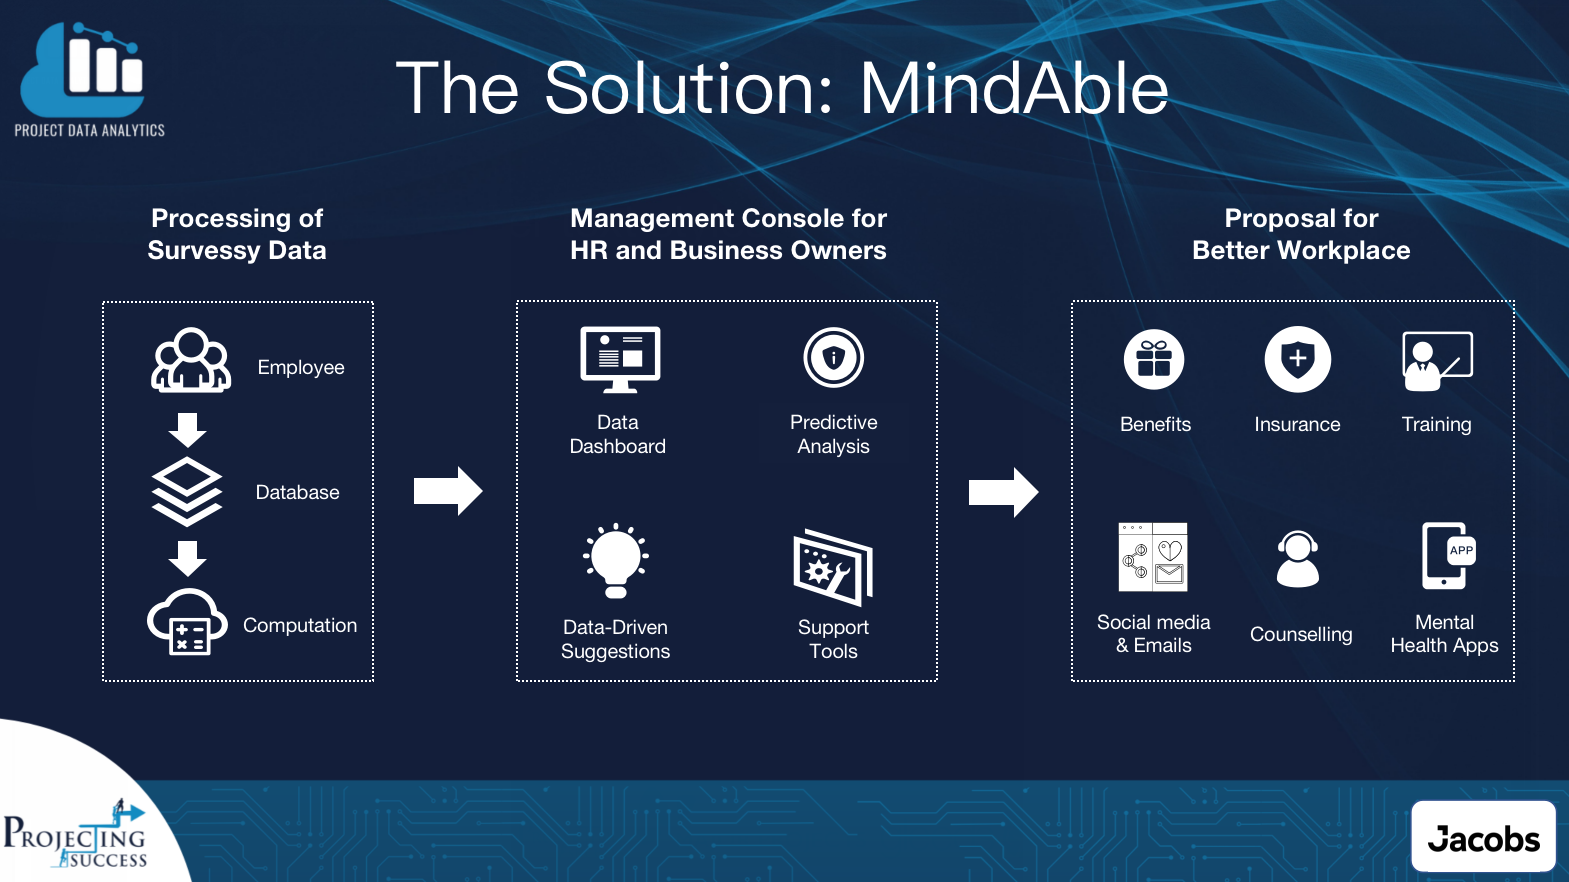

<b><div style='padding:15px;background-color:#016CC9;color:white;border-radius:5px;font-size:200%'>Import Package and Data </div></b>

In [53]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
xls = pd.ExcelFile('./data/Mental Health Data.xlsx')

In [3]:
# read multiple sheets
year = ['2014', '2016', '2017', '2018', '2019', '2020', '2021']

all_dfs = []
for y in year:
    df = pd.read_excel(xls, y)
    all_dfs.append(df)

In [4]:
all_data = pd.concat(all_dfs)

In [5]:
all_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,Would you bring up your *mental* health with a potential employer in an interview?,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What country do you *live* in?,What US state or territory do you *live* in?,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?
0,2014-12-15 00:43:49,40.0,Male,United States,AL,No,Yes,Yes,Sometimes,2025-06-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-01 09:58:28,31.0,Female,Belgium,NaN,No,No,No,NaN,26-100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-16 08:42:35,38.0,Male,United States,AL,No,Yes,Yes,Sometimes,26-100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-11-06 11:24:38,56.0,female,United States,OR,Yes,No,No,Rarely,2022-05-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-11-05 10:08:44,27.0,femail,United States,OK,No,No,No,Never,100-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# print the column index
for c in all_data.columns:
    print (c)

Timestamp
Age
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comments
Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected

<b><div style='padding:15px;background-color:#016CC9;color:white;border-radius:5px;font-size:200%'>Processing of Survessy Data </div></b>

# <b><span style='color:#4B4B4B'></span><span style='color:#016CC9'> Data Cleaning and Preprocessing  </span></b>

<font size =4>Since the columns are based on the survey question, there is no label of people who has mental health issue or not. We need to find out the target of people sufferring the mental health problems. In the datasheet, we find out there are too many hypothetical questions. Therefore, we define TWO levels of mental health condition for employees completing their survey and they are:
- <font size =4>  Type I: Potentially suffer from mental health disorders
- <font size =4>  Type II: Already suffer from mental health disorders

# <b><span style='color:#4B4B4B'></span><span style='color:#00000'> Find employees who potentially or already suffer mental health problems </span></b>

In [7]:
# effective questions for determining the types 
target_col = [
    'treatment', # Have you sought treatment for a mental health condition?
    'work_interfere', # If you have a mental health condition, do you feel that it interferes with your work?
    'mental_health_consequence', # Do you think that discussing a mental health issue with your employer would have negative consequences?
    'coworkers', # Would you be willing to discuss a mental health issue with your coworkers?
    'mental_health_consequence', # Do you think that discussing a mental health issue with your employer would have negative consequences? 
    'mental_health_interview', # Does the individual currently have mental health disorder?
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
    'Have you ever discussed your mental health with your employer?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
    'Do you currently have a mental health disorder?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?'
]

# visuliaze the survey answers subject to questions
for t in target_col:
    print ('========================')
    print (t)
    print(all_data[t].unique())

treatment
['Yes' 'No' nan]
work_interfere
['Sometimes' nan 'Rarely' 'Never' 'Often']
mental_health_consequence
['Maybe' 'No' 'Yes' nan]
coworkers
['Some of them' 'No' 'Yes' nan]
mental_health_consequence
['Maybe' 'No' 'Yes' nan]
mental_health_interview
['No' 'Maybe' 'Yes' nan]
Would you feel comfortable discussing a mental health disorder with your coworkers?
[nan 'Maybe' 'Yes' 'No']
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
[nan 'Sometimes, if it comes up' "No, because it doesn't matter"
 'No, because it would impact me negatively' 'Not applicable to me'
 'Yes, always']
If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
[nan "I'm not sure" 'Yes' 'No']
Do you believe your productivity is ever affected by a mental health issue?
[nan 'Yes' 'Not applicable to me' 'No' 'Unsure']
Would you feel comfortable discussing a mental health iss

In [8]:
def match_type_I(index, df):
    matched_df = []

    
    if index in ['coworkers', 
                 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
                ]:
        matched_df = df[ (df[index]=='Some of them') | (df[index]=='No') | (df[index]=='Yes')]
        
    if index == 'mental_health_consequence':
        matched_df = df[ (df[index]=='Sometimes') | (df[index]=='Often')]
    
    if index in ['mental_health_interview',
                 'work_interfere',
                ]:
        matched_df = df[ (df[index]=='Maybe')]
    
    if index in ['If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
                'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
                ]:
        matched_df = df[ (df[index]=='No, because it would impact me negatively')
                        | (df[index]=='Yes, always') | (df[index]=='Sometimes, if it comes up') 
                       ]
    if index in ['If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?' ,
                 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                ] : 
        matched_df = df[ (df[index]=='Yes') | (df[index]=='No') ]
    
    if index == 'Do you currently have a mental health disorder?' :
        matched_df = df[ (df[index]=='Maybe') | (df[index]=='Possibly')]
        
    return matched_df

In [9]:
def match_type_II(index, df):
    matched_df = []
    if index in ['treatment',
                 'Have you ever sought treatment for a mental health disorder from a mental health professional?']:
        matched_df = df[ (df[index]=='Yes') | (df[index]=='No')]
    
    if index in ['mental_health_interview',
                 'Do you currently have a mental health disorder?',
                 'Do you believe your productivity is ever affected by a mental health issue?',
                ]:
        matched_df = df[ (df[index]=='Yes')]
        
    if index in ['Have you ever discussed your mental health with your employer?',
                 'Do you currently have a mental health disorder?'
                ]:
        matched_df = df[ (df[index]==1)| (df[index]==0)]
        
    if index == 'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>':
        matched_df = df[ (df[index]=='Sometimes')| (df[index]=='Often') | (df[index]=='Rarely') | (df[index]=='Never')]
    
    
    return matched_df

In [10]:
type_I_dfs = []
type_II_dfs = []

for t in target_col:
    matched_df = match_type_I(t, all_data)
    if len(matched_df)>0:
        type_I_dfs.append(matched_df)
    
    matched_df = match_type_II(t, all_data)
    if len(matched_df)>0:
        type_II_dfs.append(matched_df)
    
type_I_dfs = pd.concat(type_I_dfs)
type_II_dfs = pd.concat(type_II_dfs)

In [11]:
len(type_I_dfs)

4279

In [12]:
len(type_II_dfs)

3204

# Get the rows where people are likely mental healthy

In [13]:
target_dfs = pd.merge(type_I_dfs, type_I_dfs)
# get the rows where people are likly mental healthy
df_merge = pd.merge(all_data, target_dfs, how='inner')
all_data = all_data.append(df_merge) 

all_data['Duplicated'] = all_data.duplicated(keep=False) # keep=False marks the duplicated row with a True
df_final = all_data[~all_data['Duplicated']] # selects only rows which are not duplicated.
del df_final['Duplicated'] # delete the indicator column

/var/folders/dt/_85w7mvd1h5ff3x6kqwzbd3w0000gn/T/ipykernel_8076/3767860516.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df_merge)


In [14]:
healthy_df = df_final
healthy_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,Would you bring up your *mental* health with a potential employer in an interview?,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What country do you *live* in?,What US state or territory do you *live* in?,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,4.0,No,No,0,United States of America,Florida,United States of America,Florida,NaN
123,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maybe,8.0,No,Maybe/Not sure,0,Netherlands,NaN,Netherlands,NaN,NaN
127,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,3.0,No,No,0,Portugal,NaN,Portugal,NaN,NaN
129,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,3.0,Maybe/Not sure,Maybe/Not sure,1,India,NaN,India,NaN,NaN


In [15]:
healthy_df['labels'] = '0'
type_I_dfs['labels'] = '1'
type_II_dfs['labels'] = '2'
all_dfs = pd.concat([healthy_df, type_I_dfs, type_II_dfs])

/var/folders/dt/_85w7mvd1h5ff3x6kqwzbd3w0000gn/T/ipykernel_8076/2711298567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_df['labels'] = '0'


In [16]:
all_dfs.describe()

,Age,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of Â mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,...,Describe the circumstances of the supportive or well handled response.,"Overall, how well do you think the tech industry supports employees with mental health issues?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em>Â and only with your permission.),<strong>Are you self-employed?</strong>,<strong>Do you have previous employers?</strong>,"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.),*What disorder(s) have you been diagnosed with?*,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Have you been diagnosed with COVID-19?
count,2.619000e+03,3646.000000,4567.000000,3582.000000,730.000000,3646.000000,2016.000000,5855.000000,3281.000000,3271.000000,...,0.0,3839.000000,1626.000000,871.000000,871.000000,871.000000,871.000000,0.0,1342.000000,0.0
mean,1.145476e+08,0.273999,0.737902,0.929369,0.657534,0.881788,0.631944,34.839966,0.308443,0.438398,...,NaN,2.556134,0.330258,0.111366,0.873708,5.351320,0.368542,NaN,5.109538,NaN
std,3.383194e+09,0.446070,0.439824,0.256243,0.474860,0.322903,0.482396,10.068802,0.461921,0.496267,...,NaN,0.948883,0.470451,0.314766,0.332369,2.301548,0.482687,NaN,2.337787,NaN
min,-1.726000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,2.700000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,29.000000,0.000000,0.000000,...,NaN,2.000000,0.000000,0.000000,1.000000,4.000000,0.000000,NaN,4.000000,NaN
50%,3.100000e+01,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000,0.000000,0.000000,...,NaN,3.000000,0.000000,0.000000,1.000000,5.000000,0.000000,NaN,5.000000,NaN
75%,3.600000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,1.000000,1.000000,...,NaN,3.000000,1.000000,0.000000,1.000000,7.000000,1.000000,NaN,7.000000,NaN
max,1.000000e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000,1.000000,1.000000,...,NaN,5.000000,1.000000,1.000000,1.000000,10.000000,1.000000,NaN,10.000000,NaN


<b><div style='padding:15px;background-color:#016CC9;color:white;border-radius:5px;font-size:200%'> Data Dashboard </div></b>

# Insight I: Employees' Background

# Age

<AxesSubplot:>

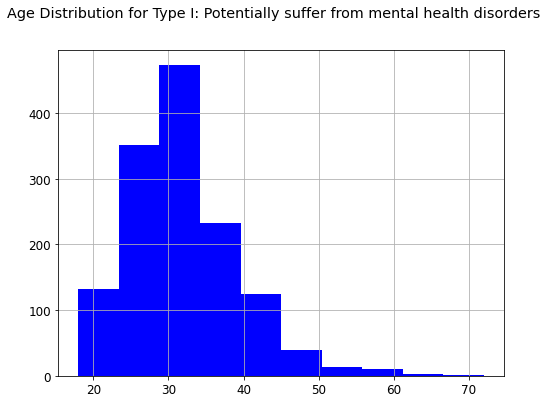

In [17]:

plt.rcParams.update({'font.size': 12})
tmp1 = type_I_dfs[ (type_I_dfs['Age']>=18) & (type_I_dfs['Age']<= 99)]
pl.suptitle("Age Distribution for Type I: Potentially suffer from mental health disorders")
tmp1 ['Age'].hist(figsize=(8, 6), color = "Blue")

<AxesSubplot:>

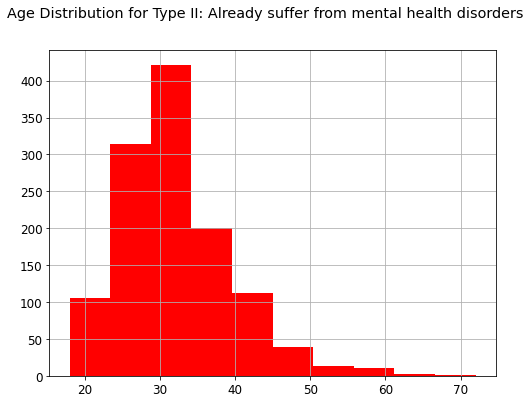

In [18]:
tmp2 = type_II_dfs[ (type_II_dfs['Age']>=18) & (type_II_dfs['Age']<= 99)]
pl.suptitle("Age Distribution for Type II: Already suffer from mental health disorders")
tmp2 ['Age'].hist(figsize=(8, 6), color = "red")

<AxesSubplot:>

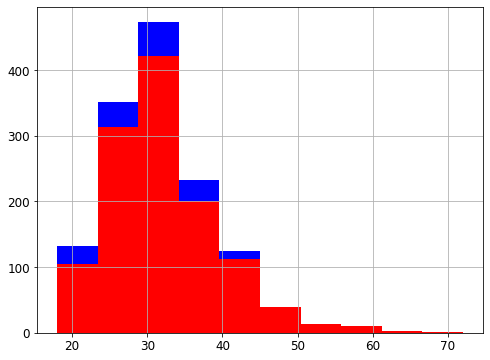

In [19]:
tmp1 ['Age'].hist(figsize=(8, 6), color = "Blue")
tmp2 ['Age'].hist(figsize=(8, 6), color = "red")

<font size =4> The age distributions of two types of mental health condition groups are similar

# Gender

Text(0, 0.5, '')

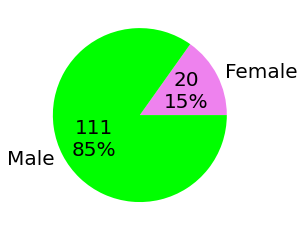

In [20]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig = plt.figure()
ax = fig.add_subplot(111)
tmp1 = type_I_dfs [ (type_I_dfs['Gender']=='Male') | (type_I_dfs['Gender']=='Female')]
tmp1.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20}, colors=['violet', 'lime'])
ax.set_ylabel('')

Text(0, 0.5, '')

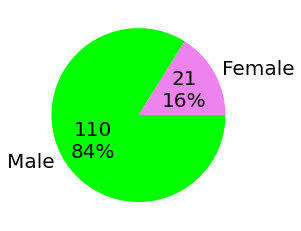

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp2 = type_II_dfs [ (type_II_dfs['Gender']=='Male') | (type_II_dfs['Gender']=='Female')]
tmp2.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20}, colors=['violet', 'lime'])
ax.set_ylabel('')

<font size =4> The gender distributions of two types of mental health condition groups are similar

# Insight II: Work Environment

<AxesSubplot:>

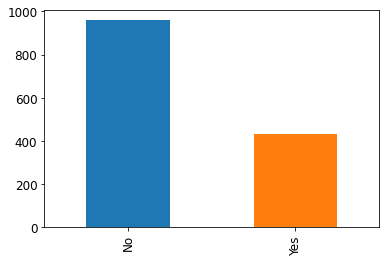

In [22]:
tmp1 = type_I_dfs[(type_I_dfs['remote_work']== 'Yes') | (type_I_dfs['remote_work']== 'No')   ]
tmp1['remote_work'].value_counts().plot(kind='bar',color=['C0', 'C1'])

<AxesSubplot:>

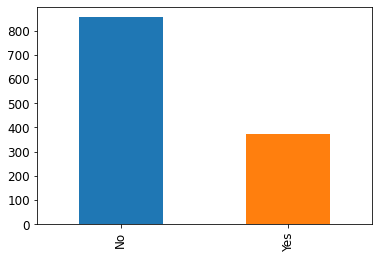

In [23]:
tmp2 = type_II_dfs[(type_II_dfs['remote_work']== 'Yes') | (type_II_dfs['remote_work']== 'No')   ]
tmp2['remote_work'].value_counts().plot(kind='bar',color=['C0', 'C1'])

<AxesSubplot:xlabel='Type,remote_work'>

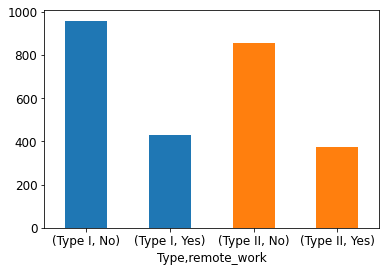

In [24]:
tmp = pd.concat([tmp1, tmp2])
tmp['Type'] = (len(tmp1)*('Type I',) + len(tmp2)*('Type II',))
tmp.groupby(['Type']).remote_work.value_counts().plot(kind='bar',color=['C0', 'C0','C1','C1'], rot=0)

# Insight III: Mental Health Domain

# Association with Physical Health 

In [25]:
# Find the questions related to physical health
keyword = 'physical'
key_cols = []
for col in all_data.columns:
    if keyword in col:
        key_cols.append (col)
print (key_cols)

['mental_vs_physical', 'Do you think that discussing a physical health issue with your employer would have negative consequences?', 'Do you feel that your employer takes mental health as seriously as physical health?', 'Do you think that discussing a physical health issue with previous employers would have negative consequences?', 'Did you feel that your previous employers took mental health as seriously as physical health?', 'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', 'Overall, how much importance does your employer place on physical health?', 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?', 'Overall, how much importance did your previous employer place on physical health?']


In [26]:
for index in key_cols:
    print ('========================')
    print (index)
    print (all_data[index].unique())

mental_vs_physical
['Yes' "Don't know" 'No' nan]
Do you think that discussing a physical health issue with your employer would have negative consequences?
[nan 'No' 'Maybe' 'Yes']
Do you feel that your employer takes mental health as seriously as physical health?
[nan "I don't know" 'Yes' 'No']
Do you think that discussing a physical health issue with previous employers would have negative consequences?
[nan 'None of them' 'Some of them' 'Yes, all of them']
Did you feel that your previous employers took mental health as seriously as physical health?
[nan "I don't know" 'Some did' 'None did' 'Yes, they all did']
Would you be willing to bring up a physical health issue with a potential employer in an interview?
[nan 'Maybe' 'Yes' 'No']
Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
[nan 'Same level of comfort for each' 'Physical health' 'Mental health']
Overall, how much importance does your employer place on physical health?
[

<AxesSubplot:>

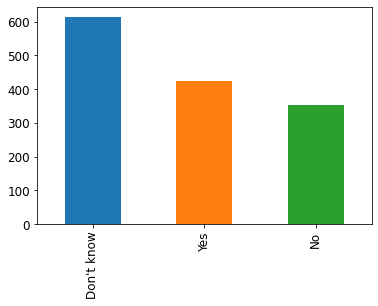

In [27]:
tmp1 = type_I_dfs[(type_I_dfs['mental_vs_physical']== 'Yes') | (type_I_dfs['mental_vs_physical']== 'No') | (type_I_dfs['mental_vs_physical']== "Don't know")   ]
tmp1['mental_vs_physical'].value_counts().plot(kind='bar',color=['C0', 'C1' , 'C2'])

<AxesSubplot:>

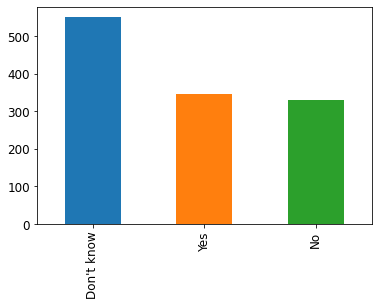

In [28]:
tmp2 = type_II_dfs[(type_II_dfs['mental_vs_physical']== 'Yes') | (type_II_dfs['mental_vs_physical']== 'No') | (type_II_dfs['mental_vs_physical']== "Don't know")   ]
tmp2['mental_vs_physical'].value_counts().plot(kind='bar',color=['C0', 'C1' , 'C2'])

<AxesSubplot:ylabel='mental_vs_physical'>

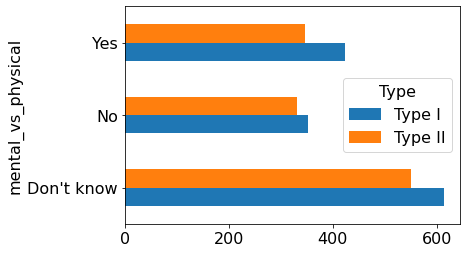

In [29]:
plt.rcParams.update({'font.size': 16})
tmp = pd.concat([tmp1, tmp2])
tmp['Type'] = (len(tmp1)*('Type I',) + len(tmp2)*('Type II',))
tmp.groupby(['Type']).mental_vs_physical.value_counts().unstack(0).plot.barh()

# Insight IV: Data Changes

In [30]:
# read multiple sheets
year = ['2014', '2016', '2017', '2018', '2019', '2020', '2021']

count_by_year = []
for y in year:
    df = pd.read_excel(xls, y)
    count = 0 
    for index in key_cols:
        try:
            count += len(df[(df[index]== 'Yes')])
        except:
            pass
    count_by_year.append(count/len(df)*100)

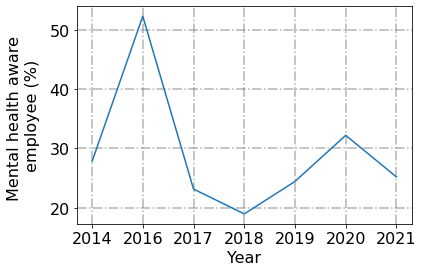

In [31]:
plt.plot(year, count_by_year)
plt.xlabel("Year")
plt.ylabel("Mental health aware \n employee (%) ", labelpad=10)
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.show()

<b><div style='padding:15px;background-color:#016CC9;color:white;border-radius:5px;font-size:200%'>Predictive Analysis </div></b>

# Data Preparation

In [32]:
# Filling missing values
all_dfs = all_dfs.replace(np.nan, 0)

# Encoding categorical variables
all_dfs_enconde = pd.get_dummies(all_dfs)

# Filling missing values
all_dfs_enconde = all_dfs_enconde.replace(np.nan, 0)


/Users/rc/miniforge3/envs/ds/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [33]:
all_dfs_enconde

,Age,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of Â mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,...,What US state or territory do you *work* in?_Texas,What US state or territory do you *work* in?_Utah,What US state or territory do you *work* in?_Vermont,What US state or territory do you *work* in?_Virginia,What US state or territory do you *work* in?_Washington,What US state or territory do you *work* in?_Wisconsin,What US state or territory do you *work* in?_Wyoming,labels_0,labels_1,labels_2
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,29.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,38.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,43.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,42.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
124,0.0,0.0,1.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
126,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
127,0.0,0.0,1.0,1.0,0.0,0.0,0.0,49.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
X = all_dfs_enconde.iloc[:, 0:-3]
y = all_dfs_enconde.iloc[:, -3:]

# Training

In [45]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100,max_depth=2, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y) 

RandomForestRegressor(max_depth=2, random_state=0)

# Inferencing

In [50]:
regressor.predict(X)

array([[0.80046471, 0.19953529, 0.        ],
       [0.80046471, 0.19953529, 0.        ],
       [0.80046471, 0.19953529, 0.        ],
       ...,
       [0.02720948, 0.5838874 , 0.38890312],
       [0.47875669, 0.02001161, 0.5012317 ],
       [0.47875669, 0.02001161, 0.5012317 ]])